<h1> Plotting PDFs using Polynomial Chaos

Recall, in one of the earlier notebooks we learnt that we can plot "input" PDFs. We also learnt that we can approximate our model's quantity of interest (output of the computational model) using a polynomial expansion; approximate its mean, variance and even Sobol' indices using the polynomial coefficients. In this notebook, we demonstrate how to compute a PDF of the quantity of interest. Let's assume that our model is the following analytical function

$$f(x_1, x_2) = exp(x_1 + x_2) - 0.5 cos(2 \pi x_1),$$

defined over $\mathcal{X} \in [-1,1]^2$. Here both variables have truncated Gaussian distributions with $mu=0.1$ and $\sigma^2=0.05$. 

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

Writing out the parameters

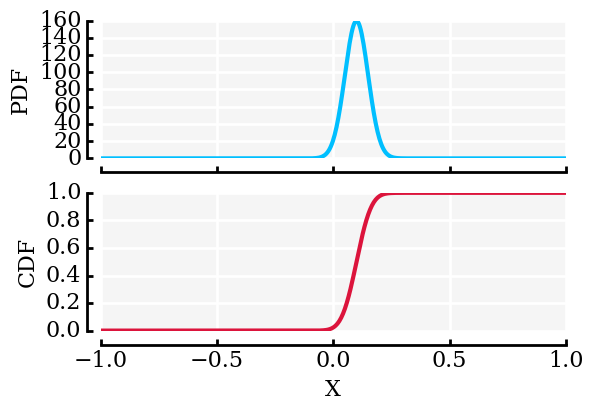

In [2]:
x1 = Parameter(lower=-1, upper=1, points=6, shape_parameter_A=0.1, shape_parameter_B=0.05, param_type='TruncatedGaussian')
x2 = Parameter(lower=-1, upper=1, points=6, shape_parameter_A=0.1, shape_parameter_B=0.05, param_type='TruncatedGaussian')
x1.plot()

Writing out the function

In [3]:
def expfun(x):
    return np.exp(x[0] + x[1] ) - 0.5*np.cos(x[0]*2*np.pi)

We will use a tensor grid with a maximum univariate order of 5 in each direction to propagate the uncertainties

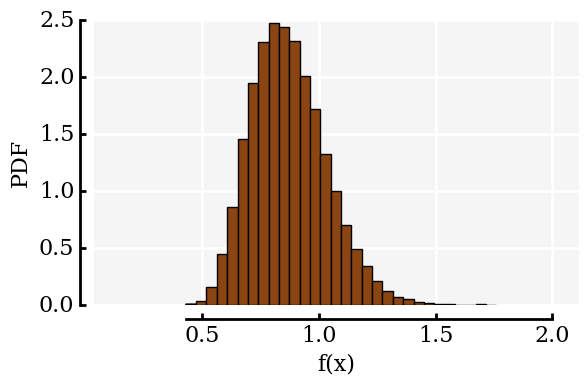

In [4]:
T = IndexSet('Tensor grid', [5,5])
uq = Polyint([x1,x2], T)
output = uq.getPDF(expfun, graph=1, filename='fig.eps')

Voila!